## Dogs vs. Cats Classification

Select free T4 GPU in Runtime settings

## Download data

In [ ]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG

Downloading...
From (original): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG
From (redirected): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG&confirm=t&uuid=b60f6e12-d2c6-4d50-85cd-be3d952e855a
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:16<00:00, 50.7MB/s]


In [5]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_file:
    zip_file.extractall('data')

with zipfile.ZipFile('data/train.zip', 'r') as zip_file:
    zip_file.extractall('data/')

In [ ]:
## Prepare load

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-06-19 16:22:41.245669: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-19 16:22:41.253064: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-19 16:22:41.304740: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-19 16:22:41.360230: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750342961.441459  928005 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750342961.46

In [6]:
# Paths
base_dir = 'data/train'
train_dir = 'data/train_split'
val_dir = 'data/val_split'

# Create directories
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cats'), exist_ok=True)

# Split data
filenames = os.listdir(base_dir)
train_files, val_files = train_test_split(filenames, test_size=0.2, random_state=42)

for file in train_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'cats', file))

for file in val_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'cats', file))

## Create data generators

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
type(train_generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

## Create basic CNN classification model

In [9]:
from tensorflow.keras import models, layers

# Build the model
model_basic = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train basic model

In [9]:
history_model_basic = model_basic.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10


/home/kast/m-eng-robotics/embeded-systems/thd-mro-em-labs/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 527s 833ms/step - accuracy: 0.5696 - loss: 0.6876 - val_accuracy: 0.7514 - val_loss: 0.5181
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 794s 1s/step - accuracy: 0.7697 - loss: 0.4836 - val_accuracy: 0.8014 - val_loss: 0.4421
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 511s 818ms/step - accuracy: 0.8238 - loss: 0.3872 - val_accuracy: 0.8144 - val_loss: 0.4040
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 364s 580ms/step - accuracy: 0.8616 - loss: 0.3145 - val_accuracy: 0.8268 - val_loss: 0.3970
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 346s 554ms/step - accuracy: 0.9018 - loss: 0.2329 - val_accuracy: 0.8084 - val_loss: 0.4655
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 482s 771ms/step - accuracy: 0.9450 - loss: 0.1463 - val_accuracy: 0.8352 - val_loss: 0.4960
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 367s 587ms/step - accuracy: 0.9707 - loss: 0.0801 - val_accuracy: 0.8256 - val_loss: 0.6622
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 361s 578ms/step - accuracy: 0.9886 - loss: 0.0367 

## Plot accuracy and loss

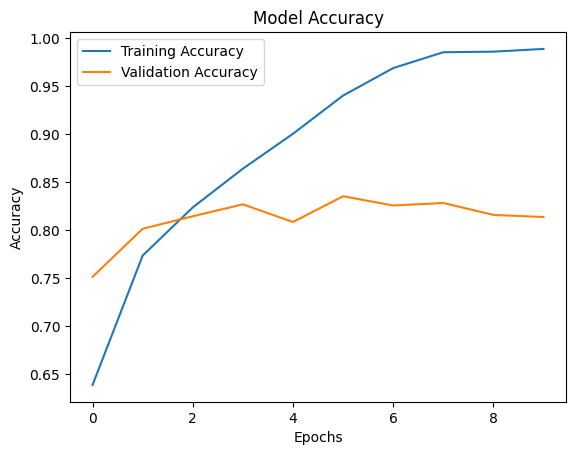

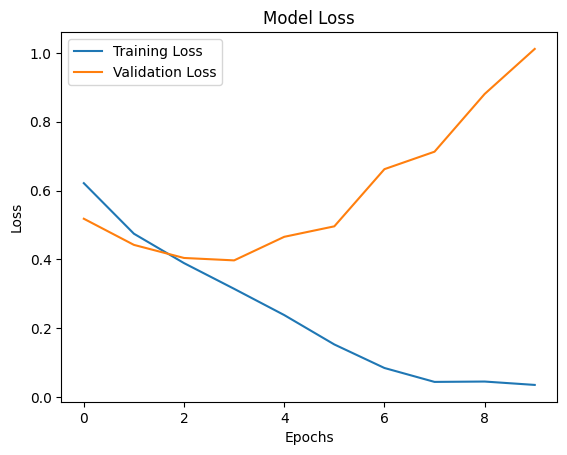

In [10]:
plt.plot(history_model_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_basic.history['loss'], label='Training Loss')
plt.plot(history_model_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Tasks

## Add regularization

- Copy the model from above and rename
- Add different regularization methods as described in the lab instructions and evaluate results.




## Dropout Regularization

In [ ]:
model_dropout = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_dropout.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [15]:
history_model_dropout = model_dropout.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 531s 845ms/step - accuracy: 0.5562 - loss: 0.7100 - val_accuracy: 0.6618 - val_loss: 0.6337
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 407s 651ms/step - accuracy: 0.6747 - loss: 0.6073 - val_accuracy: 0.6988 - val_loss: 0.5516
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 426s 682ms/step - accuracy: 0.7471 - loss: 0.5182 - val_accuracy: 0.7954 - val_loss: 0.4533
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 433s 692ms/step - accuracy: 0.7980 - loss: 0.4366 - val_accuracy: 0.8052 - val_loss: 0.4295
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 747s 1s/step - accuracy: 0.8308 - loss: 0.3852 - val_accuracy: 0.8138 - val_loss: 0.4160
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 591s 946ms/step - accuracy: 0.8515 - loss: 0.3375 - val_accuracy: 0.8208 - val_loss: 0.3997
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 656s 1s/step - accuracy: 0.8740 - loss: 0.2892 - val_accuracy: 0.8320 - val_loss: 0.3816
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 617s 988ms/step - accuracy: 0.8954 - loss:

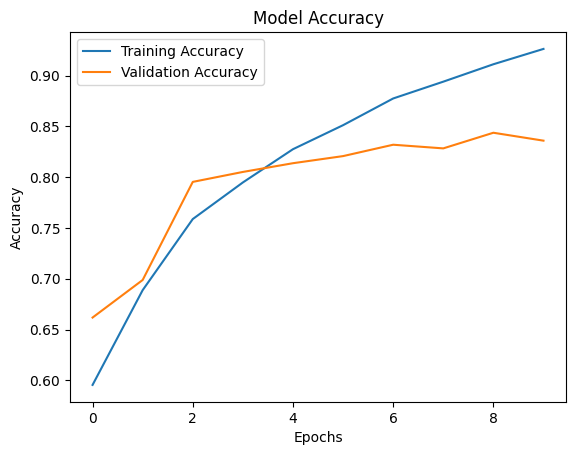

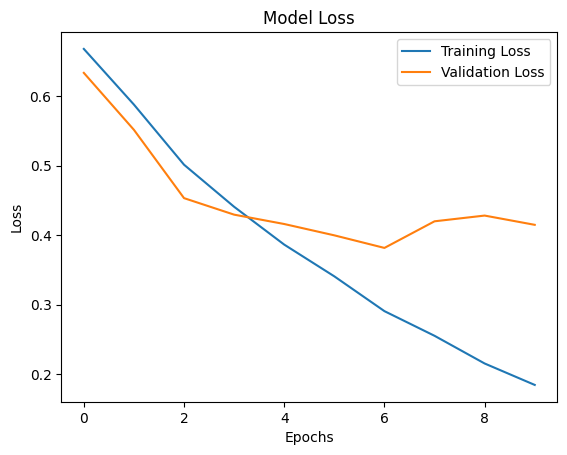

In [17]:
plt.plot(history_model_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_dropout.history['loss'], label='Training Loss')
plt.plot(history_model_dropout.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## L2 Regularization

In [18]:
from tensorflow.keras import regularizers

model_l2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

model_l2.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
model_l2.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

history_l2 = model_l2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 418s 666ms/step - accuracy: 0.5755 - loss: 0.7748 - val_accuracy: 0.7352 - val_loss: 0.5846
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 397s 636ms/step - accuracy: 0.7205 - loss: 0.5874 - val_accuracy: 0.7518 - val_loss: 0.5581
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 350s 560ms/step - accuracy: 0.7681 - loss: 0.5284 - val_accuracy: 0.7936 - val_loss: 0.4983
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 183s 293ms/step - accuracy: 0.7904 - loss: 0.4909 - val_accuracy: 0.7996 - val_loss: 0.4892
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 183s 293ms/step - accuracy: 0.8051 - loss: 0.4796 - val_accuracy: 0.7940 - val_loss: 0.5028
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 343s 549ms/step - accuracy: 0.8164 - loss: 0.4656 - val_accuracy: 0.7896 - val_loss: 0.5110
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 367s 588ms/step - accuracy: 0.8310 - loss: 0.4411 - val_accuracy: 0.8142 - val_loss: 0.4689
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 373s 596ms/step - accuracy: 0.8388 -

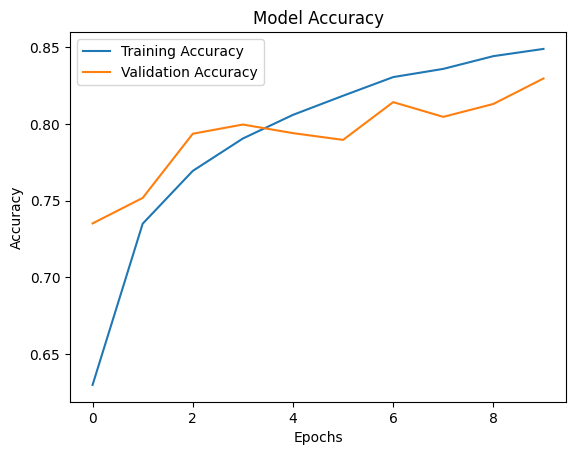

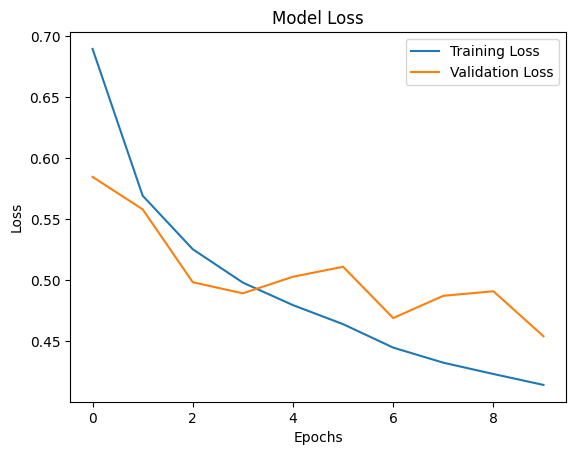

In [21]:
plt.plot(history_l2.history['accuracy'], label='Training Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_l2.history['loss'], label='Training Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Combined Regularization - Configuration 1
- 0.3 Dropout at first and last convolution layers
- 0.5 Droput before output layers
- $\lambda$ = 0.001 for L2 regularization

In [ ]:
from tensorflow.keras import models, layers, regularizers

model_combined_config1 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_combined_config1.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [24]:

history_combined_config1 = model_combined_config1.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 413s 658ms/step - accuracy: 0.4983 - loss: 0.8732 - val_accuracy: 0.5762 - val_loss: 0.7146
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 404s 647ms/step - accuracy: 0.5600 - loss: 0.7085 - val_accuracy: 0.5806 - val_loss: 0.6890
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 379s 606ms/step - accuracy: 0.5684 - loss: 0.6920 - val_accuracy: 0.5888 - val_loss: 0.6809
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 370s 592ms/step - accuracy: 0.5753 - loss: 0.6855 - val_accuracy: 0.6026 - val_loss: 0.6741
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 325ms/step - accuracy: 0.5818 - loss: 0.6817 - val_accuracy: 0.6214 - val_loss: 0.6632
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 321ms/step - accuracy: 0.5679 - loss: 0.6801 - val_accuracy: 0.6342 - val_loss: 0.6531
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 237s 380ms/step - accuracy: 0.5995 - loss: 0.6662 - val_accuracy: 0.6310 - val_loss: 0.6473
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 367s 588ms/step - accuracy: 0.6063 -

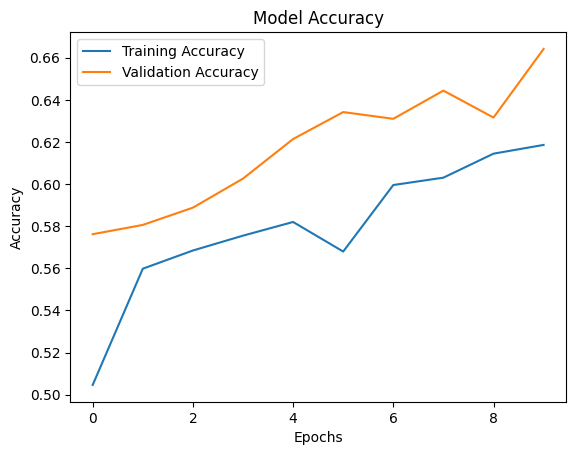

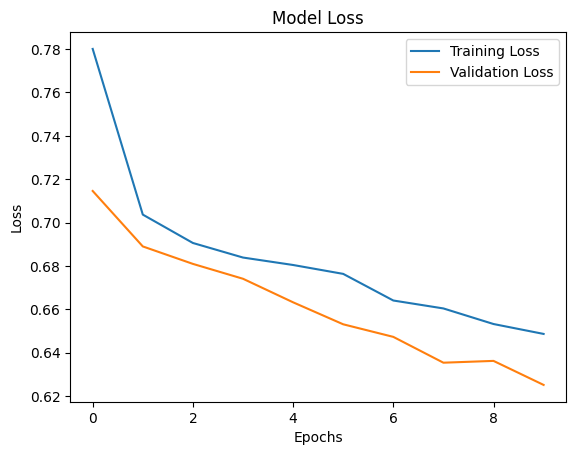

In [26]:
plt.plot(history_combined_config1.history['accuracy'], label='Training Accuracy')
plt.plot(history_combined_config1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_combined_config1.history['loss'], label='Training Loss')
plt.plot(history_combined_config1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Combined Regularization - Configuration 2
- 0.5 Dropout at first and last convolution layers
- 0.5 Droput before output layers
- $\lambda$ = 0.01 for L2 regularization

In [27]:
from tensorflow.keras import models, layers, regularizers

model_combined_config2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_combined_config2.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [28]:
history_combined_config2 = model_combined_config2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 292s 466ms/step - accuracy: 0.5565 - loss: 0.8149 - val_accuracy: 0.6586 - val_loss: 0.6370
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 380s 608ms/step - accuracy: 0.6747 - loss: 0.6325 - val_accuracy: 0.7066 - val_loss: 0.5844
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 292s 468ms/step - accuracy: 0.7175 - loss: 0.5875 - val_accuracy: 0.7172 - val_loss: 0.5846
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 269s 430ms/step - accuracy: 0.7370 - loss: 0.5614 - val_accuracy: 0.7672 - val_loss: 0.5207
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 276s 440ms/step - accuracy: 0.7667 - loss: 0.5256 - val_accuracy: 0.7520 - val_loss: 0.5402
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 280s 448ms/step - accuracy: 0.7774 - loss: 0.5160 - val_accuracy: 0.7794 - val_loss: 0.5083
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 286s 458ms/step - accuracy: 0.7850 - loss: 0.5018 - val_accuracy: 0.7924 - val_loss: 0.4925
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 287s 458ms/step - accuracy: 0.7976 -

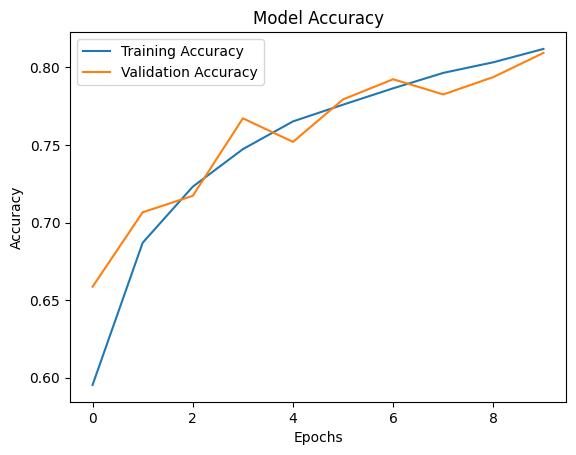

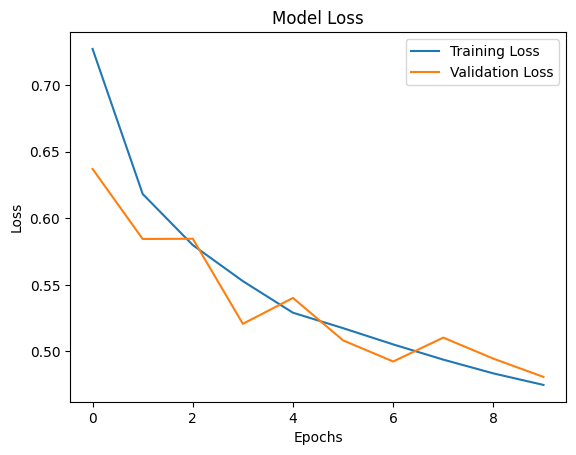

In [29]:
plt.plot(history_combined_config2.history['accuracy'], label='Training Accuracy')
plt.plot(history_combined_config2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_combined_config2.history['loss'], label='Training Loss')
plt.plot(history_combined_config2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Early Stopping

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [34]:
model_early_stop = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_early_stop.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [35]:
history_model_early_stop = model_early_stop.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 425s 678ms/step - accuracy: 0.6066 - loss: 0.6589 - val_accuracy: 0.7450 - val_loss: 0.5213
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 461s 737ms/step - accuracy: 0.7733 - loss: 0.4719 - val_accuracy: 0.7664 - val_loss: 0.4786
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 478s 766ms/step - accuracy: 0.8303 - loss: 0.3770 - val_accuracy: 0.8144 - val_loss: 0.4186
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 460s 737ms/step - accuracy: 0.8707 - loss: 0.2972 - val_accuracy: 0.8278 - val_loss: 0.4035
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 487s 780ms/step - accuracy: 0.9207 - loss: 0.2019 - val_accuracy: 0.8286 - val_loss: 0.4436
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 508s 814ms/step - accuracy: 0.9616 - loss: 0.1036 - val_accuracy: 0.8196 - val_loss: 0.5918
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 542s 868ms/step - accuracy: 0.9776 - loss: 0.0628 - val_accuracy: 0.8252 - val_loss: 0.7125


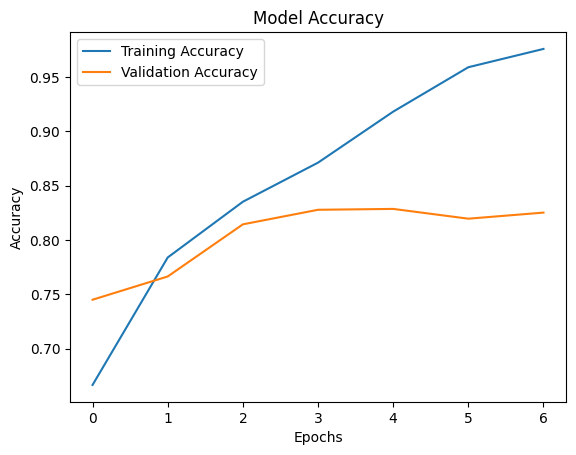

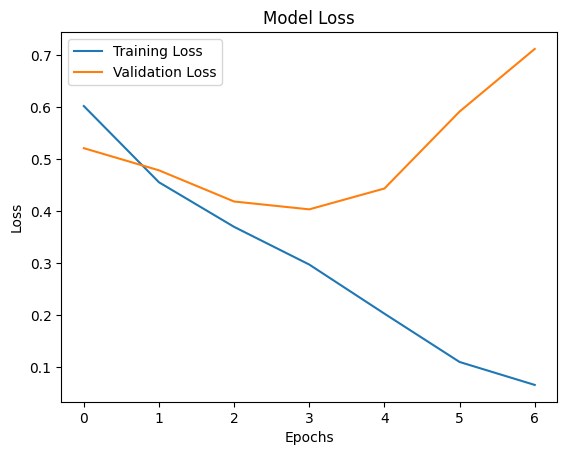

In [36]:
plt.plot(history_model_early_stop.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_early_stop.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_early_stop.history['loss'], label='Training Loss')
plt.plot(history_model_early_stop.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()